**Predicción de Cancelación - Telecom X**


#**Sobre el proyecto**

##**Segunda Parte - Información**

###**Telecom X – Parte 2: Predicción de Cancelación (Churn)**


**Misión**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

**Objetivos del Desafío**

  * Preparar los datos para el modelado (tratamiento, codificación, normalización).
  * Realizar análisis de correlación y selección de variables.
  * Entrenar dos o más modelos de clasificación.
  * Evaluar el rendimiento de los modelos con métricas.
  * Interpretar los resultados, incluyendo la importancia de las variables.
  *Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

**Lo que vas a practicar**

* Preprocesamiento de datos para Machine Learning
* Construcción y evaluación de modelos predictivos
* Interpretación de resultados y entrega de insights
* Comunicación técnica con enfoque estratégico

##**Librerías a utilizar**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


##**Carga de datos**

In [56]:
# El archivo fuente se encuentra en el repositorio GitHub correspondiente a este proyecto
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estadísticas y Machine Learning G8 - ONE/7.- IA aumentada - Previsión de atrasos de vuelos/DS Challenge TelecomX 2/telecom2.csv')

In [3]:
datos.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges,expected_total,difference
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.20,590.4,-2.90
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.01,539.1,-3.30
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.34,295.6,14.75
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.17,1274.0,36.15
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97,251.7,-15.70


#**Preparación manual y validación técnica de variables para modelado de churn de clientes**

##**Eliminar columnas irrelevantes**

**Selección de variables a eliminar**

* Variables derivadas a eliminar
  * **expected_total** definida como monthly_charges * tenure almacena el monto total estimado que ha cancelado el cliente desde el inicio de su contrato, por ende, tenían como objetivo evaluar la exactitud de la variable total_charges. El resultado de la evalución, no encontró discrepancias notables.

  * **daily_charges** definida como total_charges / tenure * 30, este promedio tenía como objetivo analizar sí, la carga diaria tenía influencia sobre el churn. No se encontro evidencia de que afectara a la variable churn.

  * **difference** definida como expected_total - total_charges alamecena la diferencia entre lo esperado y lo cobrado al cliente. La evaluación de las diferencias arrojó que no presentaban discrepancias y no influía sobre la variable churn.

  En el contexto de crear modelos predictivos, estas variables incluirían redundancia porque, están perfectamente correlacionadas con sus variables base, como lo demuestra la matriz de correlación y gráficos de distribución creados en la primera etapa.

* Variables originales a eliminar
  * **customer_id** No aporta valor para la clasificación y predicciones, y no tiene incidencia sobre la variable churn, solo es un código para identificación del cliente.   
  * **gender** El análisis previo indica que no influye sobre el churn y que su distribución es balanceada.
  * **phone_service** El análisis previo indica que con un 90.31% es el servicio más contratado, pero sin incidencia real sobre el churn de clientes.

  Estas variables por su parte, solo crearían ruido en los modelos predictivos.

Las variables a excluir son:
* expected_total
* daily_charges
* difference
* customer_id
* gender
* phone_service

In [4]:
# Columnas a eliminar:

excluir_var = ['expected_total', 'daily_charges', 'difference', 'customer_id', 'gender', 'phone_service']
datos_modelo = datos.drop(columns=excluir_var, errors='ignore')
datos_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn              7043 non-null   int64  
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   multiple_lines     7043 non-null   int64  
 6   internet_service   7043 non-null   object 
 7   online_security    7043 non-null   int64  
 8   online_backup      7043 non-null   int64  
 9   device_protection  7043 non-null   int64  
 10  tech_support       7043 non-null   int64  
 11  streaming_tv       7043 non-null   int64  
 12  streaming_movies   7043 non-null   int64  
 13  contract           7043 non-null   object 
 14  paperless_billing  7043 non-null   int64  
 15  payment_method     7043 non-null   object 
 16  monthly_charges    7043 

In [5]:
datos_modelo.head()

,churn,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0,0,1,1,9,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0,0,0,0,9,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,1,0,0,0,4,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,1,1,1,0,13,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,1,1,1,0,3,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


##**Encoding**

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Columnas categóricas a transformar
categoricas_var = ['internet_service', 'contract', 'payment_method']

# Separar variables predictoras y objetivo
X = datos_modelo.drop('churn', axis=1)
y = datos_modelo['churn']
y_OHE = y.copy()

# Configurar codificador
encoder_OHE = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Ajustar y transformar sólo las columnas categóricas
X_cat = encoder_OHE.fit_transform(X[categoricas_var])
columnas_OHE = encoder_OHE.get_feature_names_out(categoricas_var)

# Crear DataFrame codificado
df_cat_encoded = pd.DataFrame(X_cat, columns=columnas_OHE, index=X.index)

# Eliminar columnas categóricas originales
X_sin_cat = X.drop(columns=categoricas_var)

# Concatenar columnas manteniendo el orden original
# Se reconstruye la estructura en orden original de datos_modelo
columnas_originales = list(X.columns)
df_ordenado = pd.concat([X_sin_cat, df_cat_encoded], axis=1)

# Reordenar columnas
columnas_finales = []
for col in columnas_originales:
    if col in categoricas_var:
        columnas_finales.extend([c for c in columnas_OHE if c.startswith(col + '_')])
    else:
        columnas_finales.append(col)

# Crear DataFrame final ordenado
datos_modelo_OHE = df_ordenado[columnas_finales].astype('float64')
datos_modelo_OHE.head()

,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service_Fiber optic,internet_service_No,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,contract_One year,contract_Two year,paperless_billing,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,monthly_charges,total_charges
0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,65.6,593.30
1,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.9,542.40
2,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,73.9,280.85
3,1.0,1.0,0.0,13.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,98.0,1237.85
4,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,83.9,267.40


In [7]:
datos_modelo_OHE.shape

(7043, 21)

In [8]:
y_OHE.shape

(7043,)

##**Verificación de la Proporción de Cancelación**

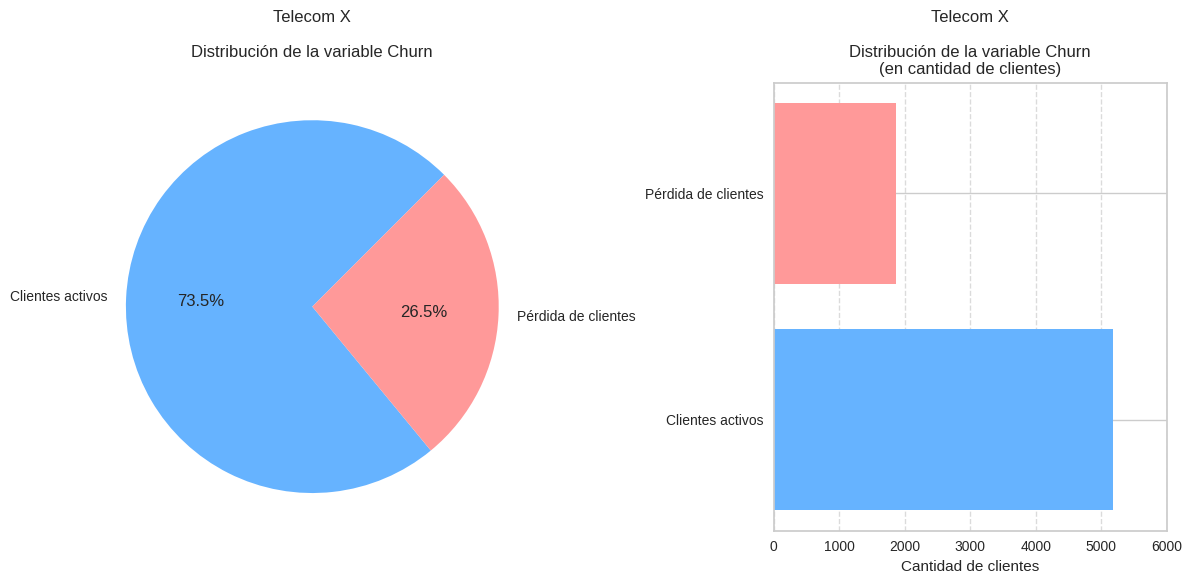

In [9]:
# Utilizar la serie Pandas y = datos_modelo['churn']
labels = ['Clientes activos', 'Pérdida de clientes']
proporciones = y_OHE.value_counts(normalize=True) * 100

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de torta
axes[0].pie(proporciones, labels=labels, autopct='%1.1f%%',
            startangle=45, colors=['#66b3ff', '#ff9999'])
axes[0].axis('equal')
axes[0].set_title('Telecom X\n\nDistribución de la variable Churn\n')


# Gráfico de barras horizontales
axes[1].barh(labels, y.value_counts(), color=['#66b3ff', '#ff9999'])
axes[1].set_xlim(0, 100)
axes[1].set_xlabel('Cantidad de clientes')
axes[1].set_title('Telecom X\n\nDistribución de la variable Churn\n(en cantidad de clientes)')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
axes[1].set_xticks(np.arange(0, 7000, 1000))

plt.tight_layout()
plt.show()

* El resultado confirma que la variable churn está moderadamente desbalanceada, con un 26.5% de clientes que hicieron churn y un 73.5% que no lo hicieron.
* Este desbalance no es fuerte, pero puede afectar las métricas al favorecer a la clase mayoritaria.
* Como el objetivo es detectar el churn, se deben aplicar métodos de balanceo que mejoren la capacidad del modelo para detectar la clase minoritaria.

##**Balanceo de clases (Opcional)**

Realizado como entrenamiento y para efectuar análisis de correlación y VIF.

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar la variable objetivo del resto de las variables. Estos datos fueron transformados con OneHotEncoder.
X1 = datos_modelo_OHE # La variable churn fue eliminada para aplicar OHE
y1 = y_OHE
# Estas variables contienen los datos orginales después de ejecutar OneHotEncoder

# Estratificación de las variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, stratify=y, test_size=0.3, random_state=42)

# Se aplica SMOTE para el balanceo de clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
# Estas variables representan los datos de entrenamiento con OHE y balanceo de clases

In [11]:
X1.shape, y1.shape

((7043, 21), (7043,))

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 21), (2113, 21), (4930,), (2113,))

In [13]:
X_train_bal.shape, y_train_bal.shape

((7244, 21), (7244,))

##**Estandarización de variables numéricas**

Los modelos no lineales a utilizar, no son afectados por la normalización o estandarización pero, el resultado del Factor de Inflación de la Varianza, requiere que el set de datos sí lo esté.

Por otro lado, la Matriz de Correlación no se ve afectada por la estandarización al usar StandardScaler.

Como la correlación de Pearson y el VIF son parte de este análisis, el set de datos será procesado con el Encoding de OneHotEncoder y la estandarización de las variables numéricas con StandardScaler en el transformador.

In [14]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas a estandarizar
numericas = ['tenure', 'monthly_charges', 'total_charges']

# Aplicación del scaler sobre la variable de entrenamiento balanceada X_train_bal
scaler = StandardScaler()
X_train_bal_norm = X_train_bal.copy()
X_train_bal_norm[numericas] = scaler.fit_transform(X_train_bal[numericas])
# La variable X_train_bal_norm posee los datos de entrenamiento con OHE, balanceo de clases y con variables uméricas normalizadas

In [15]:
X_train_bal_norm.shape

(7244, 21)

In [16]:
X_train_bal_norm[['tenure', 'monthly_charges', 'total_charges']].head()

,tenure,monthly_charges,total_charges
0,-0.565419,0.290091,-0.421427
1,-0.941373,0.064872,-0.774648
2,0.311807,0.246444,0.247566
3,1.272577,0.627046,1.308993
4,-1.066691,-0.647448,-0.881373


##**Analisis de correlación**

In [17]:
# Agregar churn al conjunto normalizado para análisis
X_corr = X_train_bal_norm.copy()
X_corr['churn'] = y_train_bal

# Matriz de correlación
corr_matrix = X_corr.corr(numeric_only=True)

# Correlación con churn
correlacion_churn = corr_matrix['churn'].sort_values(ascending=False)
print(correlacion_churn)


churn                                     1.000000
payment_method_Electronic check           0.353110
internet_service_Fiber optic              0.349022
paperless_billing                         0.246447
monthly_charges                           0.222624
senior_citizen                            0.179445
streaming_tv                              0.072195
streaming_movies                          0.056780
multiple_lines                            0.046197
device_protection                        -0.085034
payment_method_Mailed check              -0.098577
online_backup                            -0.117498
payment_method_Credit card (automatic)   -0.171977
partner                                  -0.190631
dependents                               -0.207272
tech_support                             -0.216585
online_security                          -0.216792
contract_One year                        -0.239556
total_charges                            -0.254043
internet_service_No            

Este análisis posterior al procesamiento busca entender como quedaron las variables despues de SMOTE y de la estandarización y, como ayuda para la selección de variables que se utilizaran en el modelo.

* **Variables con correlación positiva con churn o mayor probabilidad de abandono**


| Variable                                | Correlación | Interpretación |
|----------------------------------------|-------------|----------------|
| payment_method_Electronic check      | 0.353       | Clientes que pagan con cheque electrónico tienden a abandonar más. |
| internet_service_Fiber optic         | 0.349       | Usuarios de fibra óptica muestran mayor churn. Posible insatisfacción o competencia. |
| paperless_billing                    | 0.246       | Facturación sin papel se asocia con más churn, quizá por perfil digital más volátil. |
| monthly_charges                      | 0.223       | Cargos mensuales altos correlacionan con mayor churn. |
| senior_citizen                       | 0.179       | Los adultos mayores tienen una ligera tendencia a abandonar más. |
| streaming_tv, streaming_movies, multiple_lines | < 0.08 | Correlaciones débiles, podrían no ser significativas. |

---

* **Variables con correlación negativa con churn o menor probabilidad de abandono (Retención)**

| Variable                                | Correlación | Interpretación |
|----------------------------------------|-------------|----------------|
| tenure                                | -0.430      | Clientes con más antigüedad abandonan menos. Muy relevante. |
| contract_Two year                     | -0.395      | Contratos largos retienen mejor. |
| internet_service_No                   | -0.279      | Quienes no tienen internet tienden a quedarse (posible perfil básico). |
| total_charges                         | -0.254      | Clientes con mayor gasto acumulado tienden a quedarse. |
| contract_One year                     | -0.240      | También ayuda a retener, aunque menos que el de dos años. |
| online_security, tech_support      | ≈ -0.216    | Servicios de soporte y seguridad ayudan a retener. |
| dependents, partner                | ≈ -0.20     | Tener dependientes o pareja se asocia con menor churn. |
| payment_method_Credit card (automatic)| -0.172     | Pagos automáticos con tarjeta ayudan a retener. |


1. **Variables que pueden permanecer en el set de datos**:
   - tenure, contract_Two year, payment_method_Electronic check, internet_service_Fiber optic, monthly_charges
   - Justificación: alta correlación con churn, sentido práctico y potencial predictivo.

2. **Variables con indicios de colinealidad**:
   - monthly_charges vs total_charges vs tenure: podrían estar correlacionadas entre sí.
   - contract_* vs tenure: contratos largos implican mayor permanencia.

3. **Variables que no aportan valor por su baja o nula correlación**:
   - streaming_tv, streaming_movies, multiple_lines: podrían ser descartables si no aportan en modelos no lineales.

In [18]:
# Matriz de correlación entre total_charges y monthly_charges
datos_modelo_OHE[['monthly_charges', 'total_charges', 'tenure']].corr()

,monthly_charges,total_charges,tenure
monthly_charges,1.000000,0.651174,0.247900
total_charges,0.651174,1.000000,0.826178
tenure,0.247900,0.826178,1.000000


In [19]:
# Matriz de correlación entre contract_* y tenure
datos_modelo_OHE[['contract_One year', 'contract_Two year', 'tenure']].corr()

,contract_One year,contract_Two year,tenure
contract_One year,1.00000,-0.289510,0.202570
contract_Two year,-0.28951,1.000000,0.558533
tenure,0.20257,0.558533,1.000000


**Observaciones**

**Matriz de comparación: monthly_charges, total_charges, tenure**

| Variable 1        | Variable 2        | Correlación | Interpretación |
|------------------|------------------|-------------|----------------|
| monthly_charges| total_charges  | 0.65        | Relación moderada-alta: clientes con cargos mensuales altos tienden a acumular más gasto. |
| total_charges  | tenure         | 0.83        | Relación fuerte: mayor permanencia implica mayor gasto acumulado. |
| monthly_charges| tenure         | 0.25        | Relación débil: cargos mensuales no dependen directamente del tiempo de permanencia. |

* Se aprecia que total_charges está fuertemente influenciado por tenure, lo que sugiere redundancia.
* Evaluar la exclusión de la variable total_charges.

**Matriz de comparación: contract_One year, contract_Two year, tenure**

| Variable 1           | Variable 2           | Correlación | Interpretación |
|---------------------|---------------------|-------------|----------------|
| contract_One year | contract_Two year | -0.29       | Relación inversa moderada: son categorías excluyentes. |
| contract_Two year | tenure            | 0.56        | Relación moderada-alta: contratos largos implican mayor permanencia. |
| contract_One year | tenure            | 0.20        | Relación débil: menor impacto en permanencia. |

* contract_Two year tiene mayor poder explicativo sobre tenure, y por tanto sobre churn.
* No existe colinealidad directa por ser variables que muestran información diferente dentro de la misma variable, pero sí tienen dependencia estructural.
* Sí se usa tenure que es un fuerte predictor del churn, estudiar excluir del set de datos la variable contract_One year.
* O usar contract_* sí, se excluye tenure.

##**Factor de Inflación de la Varianza**

Para este analisis se creará un Data Frame que se procesará a través ColumnTransformer para aplicar en forma más automatizada la estandarización de las variables numéricas y el encoding, manteniendo las variables binarias

In [20]:
# Cosntrir un data frame con OHE, balanceado y estandarizado para aplicar VIF
# Variables numéricas y categóricas
numericas = ['tenure', 'monthly_charges', 'total_charges']
categoricas = ['internet_service', 'contract', 'payment_method']
binarias = ['partner', 'dependents', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocesamiento: normalización + codificación
transformador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categoricas),
    ('bin', 'passthrough', binarias)
])
# Aplicar transformación
X_transf = transformador.fit_transform(datos_modelo.drop('churn', axis=1)) # datos_modelo.drop('churn', axis=1) contiene los datos sin transformaciones

# Obtener nombres de columnas transformadas
num_cols = transformador.named_transformers_['num'].get_feature_names_out(numericas)
cat_cols = transformador.named_transformers_['cat'].get_feature_names_out(categoricas)
bin_cols = binarias

# Combinar nombres
columnas_finales = np.concatenate([num_cols, cat_cols, bin_cols])


In [22]:
# Dataframe listo para VIF
datos_modelo_OHE_stand = pd.DataFrame(X_transf, columns=columnas_finales)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = datos_modelo_OHE_stand.columns
vif_data["VIF"] = [variance_inflation_factor(datos_modelo_OHE_stand.values, i) for i in range(datos_modelo_OHE_stand.shape[1])]


In [24]:
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
1,monthly_charges,16.207192
2,total_charges,10.623808
0,tenure,7.473299
3,internet_service_Fiber optic,6.813653
4,internet_service_No,5.536440
6,contract_Two year,3.379295
17,streaming_tv,3.022968
18,streaming_movies,2.990398
19,paperless_billing,2.847564
8,payment_method_Electronic check,2.796569


**Observaciones**

**Variables con VIF alto - colinealidad preocupante**

| Variable           | VIF      | Observación |
|--------------------|----------|-------------|
| monthly_charges  | 16.21    | Muy alta colinealidad |
| total_charges    | 10.62    | Alta colinealidad |
| tenure           | 7.47     | Moderada-alta |
| internet_service_Fiber optic | 6.81 | Posible redundancia con otras dummies |
| internet_service_No | 5.53 | Similar caso |

Estas variables están correlacionadas entre sí, confirmando la matriz de correlación entre ellas:
* Corr = 0.83. total_charges Vs. tenure
* Corr = 0.65. monthly_charges Vs. total_charges

Consecuencia de la redundancia estructural en la variable total_charges que es derivada de monthly_charges y tenure.

In [25]:
# Cálculo del VIF sin la variable total_charges

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Excluir la variable con alta colinealidad
df = datos_modelo_OHE_stand.drop(columns=["total_charges"])

# Seleccionar variables numéricas
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# Estandarizar
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Calcular VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = numeric_df.columns
vif_df["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]

# Mostrar resultados
print(vif_df.sort_values(by="VIF", ascending=False))


                                   Feature        VIF
1                          monthly_charges  33.462447
2             internet_service_Fiber optic  10.048100
3                      internet_service_No   4.789861
0                                   tenure   2.775650
5                        contract_Two year   2.603686
16                            streaming_tv   2.441493
17                        streaming_movies   2.420929
7          payment_method_Electronic check   1.971248
11                          multiple_lines   1.915389
8              payment_method_Mailed check   1.839600
15                            tech_support   1.717857
14                       device_protection   1.671091
12                         online_security   1.653837
4                        contract_One year   1.618094
13                           online_backup   1.596472
6   payment_method_Credit card (automatic)   1.560147
9                                  partner   1.447545
10                          

**Observaciones**

**Análisis de VIF actualizado sin total_charges**

| Variable                        | VIF       | Observación |
|--------------------------------|-----------|-------------|
| monthly_charges              | **33.46** |  Muy alta colinealidad |
| internet_service_Fiber optic | **10.05** |  Límite superior aceptable |
| internet_service_No          | 4.79      | Moderada |
| tenure                       | 2.77      | Aceptable |
| Resto de variables             | < 2.7     | Sin problemas |

* monthly_charges presenta una colinealidad muy alta, luego de la exclusión de la variable total_charges.
* Puede tratarse de redundancia estructural con otras variables categóricas como contract_* que puede interpretarse como contratos largos implican menor cargo mensual o con los servicios que aumentan el cargo mensual.

**Para la selección de variables**:

* Dados los análisis realizados, la exclusión de total_charges es un hecho.
* tenure es un fuerte indicador de fidelidad, por lo que debe permanecer.
* monthly_charges debería permanecer, pero debe ser transformada para reducir colinelidad y mejorar la interpretabilidad.

Como los modelos a utilizar no son líneales, no serán afectados por la colinealidad o la multicolinelidad.

En los modelos a crear en este proyecto, se utilizarán las métricas que ofrecen los modelos encontrar el set de variables más apegadas al objetivo.

##**Analisis dirigido - Relaciones con la variable churn**

Para este análisis es necesario que las variables estén codificadas, más no es necesario balancear ni estandarizar el set de datos para no, crear ruido.

**Objetivos:**

* Explorar relaciones entre variables independientes y la variable objetivo.
* Detectar patrones o tendencias (por ejemplo, "a mayor monthly_charges, más probabilidad de Churn").
* Identificar posibles outliers o distribuciones sesgadas.
* Apoyo para descartar variables sin variabilidad relevante o sin relación visible con Churn.

In [26]:
# Se utilizan el data frame y la serie Pandas genereados en la sección Encoding (datos_modelo_OHE y y_OHE)
datos_modelo_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   float64
 1   partner                                 7043 non-null   float64
 2   dependents                              7043 non-null   float64
 3   tenure                                  7043 non-null   float64
 4   multiple_lines                          7043 non-null   float64
 5   internet_service_Fiber optic            7043 non-null   float64
 6   internet_service_No                     7043 non-null   float64
 7   online_security                         7043 non-null   float64
 8   online_backup                           7043 non-null   float64
 9   device_protection                       7043 non-null   float64
 10  tech_support                            7043 non-null   floa

In [27]:
datos_modelo_OHE.sample(10)

,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service_Fiber optic,internet_service_No,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,contract_One year,contract_Two year,paperless_billing,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,monthly_charges,total_charges
3188,0.0,0.0,0.0,52.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,63.25,3342.45
1511,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.40,19.40
6154,0.0,0.0,0.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,19.55,839.40
3508,0.0,1.0,0.0,71.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,84.40,5969.30
3269,0.0,0.0,0.0,12.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,67.25,832.30
3131,0.0,0.0,0.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.25,327.45
3444,0.0,1.0,1.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.25,555.40
131,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.15,223.15
2973,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56.25,389.10
5448,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,20.35,176.30


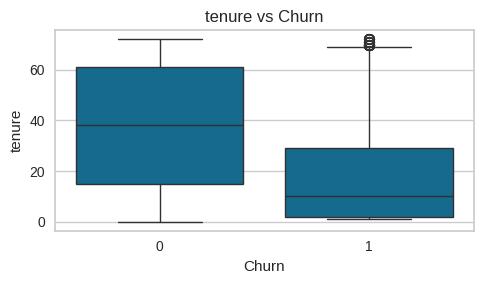

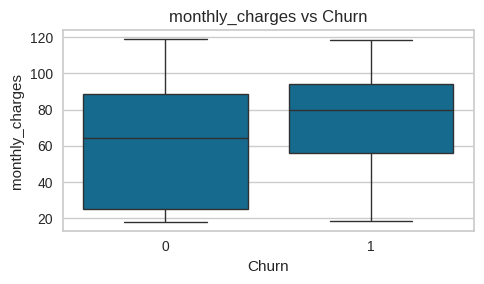

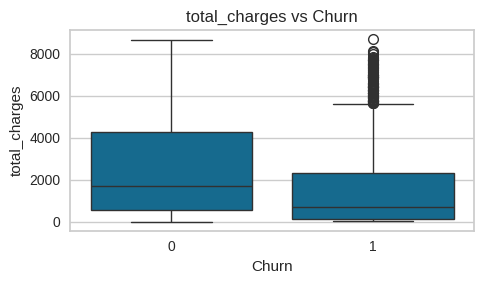

In [28]:
# Variables numéricas
numeric_cols = ['tenure', 'monthly_charges', 'total_charges']

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=y_OHE, y=datos_modelo_OHE[col])
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


**Observaciones**

* **tenure vs Churn**

  * **Churn = 1**: Tenencia claramente menor. La mayoría de estos clientes están en sus primeros meses.
  * **Churn = 0**: Son los clientes con mayor antigüedad.
  
  * Existe una relación inversa entre la duración como cliente (tenure) y la tasa de abandono. Clientes fieles son menos propensos a irse.


* **monthly_charges vs Churn**

  * **Churn = 1**: Mediana y valores en general más altos que los clientes que se quedan.
  * **Churn = 0**: Mayor dispersión, pero con una mediana más baja.

  * Los clientes con cargos mensuales altos tienen mayor probabilidad de abandonar. Puede sugerir sensibilidad al precio.

* **total_charges vs Churn**

  * **Churn = 0**: Distribución amplia, con una mediana considerablemente mayor.
  * **Churn = 1**: Valores más concentrados en rangos bajos de total_charges, con varios outliers.
  
  * Clientes que abandonan (Churn = 1) tienden a tener menos cargos acumulados. Esto sugiere que muchos clientes se van pronto, antes de acumular cargos elevados.

  * Desde el punto de vista de la selección de variables, las tenure, monthly_charges y total_charges aportan información que puede apoyar la predicción.

##**Resumen de logros y próximos pasos**

En los pasos anteriores, se logró:

  * Entender la estructura del set de datos mediante métricas y relaciones entre las variables
  * La detección de colinealidad y redundancias
  * La dentificación variables con relación significativa con el abandono de los clientes
  * La preparación del terreno para una selección más robusta
  * La variable total_charges es fuerte candidata para ser excluída
  * monthly_charges y teneure siguen presentando colinelidad, pero ambas son importantes por su influencia con el churn.


* Tomando en cuenta que se requieren más métricas para descartar a alguna(s) de ellas, se procederá a descartarlas o mejor dicho, a hacer la selección final de las variable con métodos más formales.

* Los siguientes pasos utilizaran modelos no lineales (Random Forest, árboles) que seleccionan variables empíricamente según su capacidad predictiva, lo que supera las limitaciones del análisis lineal y permite:

  * Capturar interacciones y no linealidades
  * Validar la relevancia de variables en el contexto del modelo
  * Depurar automáticamente sin necesidad de VIF adicional

#**Utilización de modelos no lineales para modelado de churn de clientes**

Se toma como datos de inicio el data frame datos_modelo_OHE, que posee las columnas necesarias excepto, aquellas que en el anáslisis se consideran irrelevantes. También fue tratado con OneHotEncoder incluyendo el parámetro drop='first' para evitar colinealidad perfecta.

##**Separación de datos**

In [29]:
# El Data Frame datos_modelo_OHE no posee la vaiable churn, esta se encuantra en la serie Pandas y_OHE
datos_modelo_OHE.info(), print('\n'), y_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   float64
 1   partner                                 7043 non-null   float64
 2   dependents                              7043 non-null   float64
 3   tenure                                  7043 non-null   float64
 4   multiple_lines                          7043 non-null   float64
 5   internet_service_Fiber optic            7043 non-null   float64
 6   internet_service_No                     7043 non-null   float64
 7   online_security                         7043 non-null   float64
 8   online_backup                           7043 non-null   float64
 9   device_protection                       7043 non-null   float64
 10  tech_support                            7043 non-null   floa

(None, None, None)

In [30]:
# Actualizar el tipo de dato a entero, para las variables binarias

binary_cols = ['senior_citizen', 'partner', 'dependents', 'multiple_lines', 'internet_service_Fiber optic', 'internet_service_No',
               'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_One year',
               'contract_Two year', 'paperless_billing', 'payment_method_Credit card (automatic)','payment_method_Electronic check',
               'payment_method_Mailed check']
datos_modelo_OHE[binary_cols] = datos_modelo_OHE[binary_cols].astype(int)
datos_modelo_OHE.head()


,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service_Fiber optic,internet_service_No,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,contract_One year,contract_Two year,paperless_billing,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,monthly_charges,total_charges
0,0,1,1,9.0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,65.6,593.30
1,0,0,0,9.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,59.9,542.40
2,0,0,0,4.0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,73.9,280.85
3,1,1,0,13.0,0,1,0,0,1,1,...,1,1,0,0,1,0,1,0,98.0,1237.85
4,1,1,0,3.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,83.9,267.40


In [31]:
datos_modelo_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   int64  
 1   partner                                 7043 non-null   int64  
 2   dependents                              7043 non-null   int64  
 3   tenure                                  7043 non-null   float64
 4   multiple_lines                          7043 non-null   int64  
 5   internet_service_Fiber optic            7043 non-null   int64  
 6   internet_service_No                     7043 non-null   int64  
 7   online_security                         7043 non-null   int64  
 8   online_backup                           7043 non-null   int64  
 9   device_protection                       7043 non-null   int64  
 10  tech_support                            7043 non-null   int6

* La variable de estudio churn se encuentra almacenada en la Serie Pandas y_OHE
* El resto de las varibales en el data frame datos_modelo_OHE.
* Los datos solo están codificados con OneHotEncoder, sin balanceo ni escalado.

##**Baseline**

**Características**

* Sin SMOTE ni escalado:
  - De esta manera se busca medir el impacto real de estas técnicas en modelos posteriores.
  - Evaluar el sesgo del modelo hacia la clase mayoritaria.

* Modelo simple pero interpretable
  - Decision Tree con profundidad limitada a 3 o 5 niveles.

* Evaluación con métricas sensibles al desbalance para visualizar el sesgo hacia la clase mayoritaria
  - precision, recall, f1-score
  - roc_auc_score
  - confusion_matrix

* Validación cruzada estratificada
- StratifiedKFold para asegurar que ambas clases estén representadas en cada fold.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Separación de datos
X=datos_modelo_OHE
y=y_OHE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo baseline
modelo_arbol_BL = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arbol_BL.fit(X_train, y_train)

# Predicciones y métricas
y_pred = modelo_arbol_BL.predict(X_test)
y_proba = modelo_arbol_BL.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1294
           1       0.67      0.41      0.51       467

    accuracy                           0.79      1761
   macro avg       0.74      0.67      0.69      1761
weighted avg       0.78      0.79      0.77      1761

ROC AUC: 0.803010269767565
Matriz de confusión:
 [[1200   94]
 [ 275  192]]


**Observaciones**

Evaluación de métricas

| Métrica         | Clase 0 (No churn) | Clase 1 (Churn) | Comentario |
|-----------------|-------------------|-----------------|------------|
| **Precision**   | 0.81              | 0.67            | El modelo acierta más cuando predice "no churn" |
| **Recall**      | 0.93              | 0.41            | Detecta bien los que no se van, pero falla en capturar churn |
| **F1-score**    | 0.87              | 0.51            | Bajo balance entre precisión y recall en churn |
| **ROC AUC**     | 0.803             | —               | Aceptable discriminación global, pero no suficiente para producción |
| **Accuracy**    | 0.79              | —               | Inflada por el desbalance; no refleja calidad real en churn |

El modelo prioriza la clase mayoritaria en ausencia de las técnicas de balanceo, como se esperaba.
- El recall de churn (0.41) indica que más de la mitad de los clientes que se van no están siendo detectados.
- La matriz de confusión confirma esto: 275 falsos negativos vs. 192 verdaderos positivos.

##**Modelo sin variable total_charges**

**Características**

* No incluye la variable total_charges.

* Sin SMOTE ni escalado:
  - De esta manera se busca medir el impacto real de estas técnicas en modelos posteriores.
  - Evaluar el sesgo del modelo hacia la clase mayoritaria.

* Modelo simple pero interpretable
  - Decision Tree con profundidad limitada a 3 a 5 niveles.

* Evaluación con métricas sensibles al desbalance para visualizar el sesgo hacia la clase mayoritaria
  - precision, recall, f1-score
  - roc_auc_score
  - confusion_matrix

* Validación cruzada estratificada
- StratifiedKFold para asegurar que ambas clases estén representadas en cada fold.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Separación de datos
X = datos_modelo_OHE.drop(columns=["total_charges"])
y=y_OHE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelo baseline
modelo_arbol_A = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_arbol_A.fit(X_train, y_train)

# Predicciones y métricas
y_pred = modelo_arbol_A.predict(X_test)
y_proba = modelo_arbol_A.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1294
           1       0.60      0.54      0.57       467

    accuracy                           0.78      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.78      0.78      0.78      1761

ROC AUC: 0.8212529248814326
Matriz de confusión:
 [[1130  164]
 [ 217  250]]


**Observaciones**

Evaluación de Métricas

| Métrica        | Clase 0 (No churn) | Clase 1 (Churn) | Global |
|----------------|--------------------|------------------|--------|
| Precision      | 0.84               | 0.60             | —      |
| Recall         | 0.87               | 0.54             | —      |
| F1-score       | 0.86               | 0.57             | —      |
| Accuracy       | —                  | —                | 0.78   |
| ROC AUC        | —                  | —                | 0.82   |

**Matriz de confusión**  

  Clase 0: 87% de recall [1130  164]

  Clase 1: 54% de recall [ 217  250]


* El modelo clasifica correctamente a la mayoría de los clientes, porque posee una alta precisión y recall para clase 0 (no churn).
* Posee una buena capacidad de discriminación entre clases con un ROC AUC de 0.82, lo que indica que el modelo separa bien las clases.
* Un F1-score para churn de 0.57 justifica un razonable balance entre precisión y recall para la clase minoritaria.
* El modelo solo detecta el 54% de los clientes que efectivamente se van, lo que puede ser insuficiente si el costo de perder clientes es alto (Recall para churn de 0.54). El recall para churn debería estar por encima de 0.60–0.65.
* 217 falsos negativos, representa pérdida directa.
* 164 falsos positivos, representa trabajo innecesario.

Acciones adicionales:
* Visualizar curva ROC y curva de precisión-recall para entender el trade-off entre recall y precisión.
* Ajustar el umbral de decisión para priorizar recall si el negocio lo requiere.
* Aplicar validación cruzada para confirmar la estabilidad de estas métricas.
* Explorar importancia de variables para entender qué está impulsando las decisiones del modelo.

**Comparación con Baseline**

| Métrica         | Baseline (con TotalCharges) | Modelo sin TotalCharges | Diferencia |
|-----------------|-------------------------------|----------------------------|------------|
| **Accuracy**     | 0.79                          | 0.78                       | −0.01      |
| **Recall (Clase 1)** | 0.41                          | 0.54                       | **+0.13**   |
| **Precision (Clase 1)** | 0.67                          | 0.60                       | −0.07      |
| **F1-score (Clase 1)** | 0.51                          | 0.57                       | **+0.06**   |
| **ROC AUC**      | 0.803                         | 0.821                       | **+0.018**  |
| **TN / FP**      | 1200 / 94                     | 1130 / 164                 | ↓ TN, ↑ FP |
| **FN / TP**      | 275 / 192                     | 217 / 250                  | ↓ FN, ↑ TP |

* Al excluir la variable total_charges se puede apreciar:

  * Recall para churn aumenta de de 0.41 a 0.54, por lo que el modelo detecta más casos de churn.
  * F1-score para churn mejora para indicar la existencia de un mejor balance entre precisión y recall.
  * ROC AUC mejora ligeramente lo que permite mejor discriminación global.
  * Aumentan los falsos positivos por la baja precisión .
  * La Clase 0 (no churn) pierde recall (de 0.93 a 0.87), permitiendo que más clientes sin churn, estén mal clasificados.


* El modelo Baseline posee  mejor precisión y recall para la clase mayoritaria (no churn), pero el modelo sin total_charges mejora significativamente la detección de churn, que para el caso de estidio, tiene más impacto y minimizaría a los clientes que se van sin ser detectados (FN).

* Como se ha sugerido la variable total_charges podría estar introduciendo ruido o colinealidad, con otras variables como tenure y monthly_charges.

- El modelo sin esa variable generaliza mejor para la clase minoritaria, aunque a costa de más falsos positivos.

* Como el objetivo del negocio es detectar churn con mayor sensibilidad, el modelo sin TotalCharges es preferible.

###**Acciones adicionales**

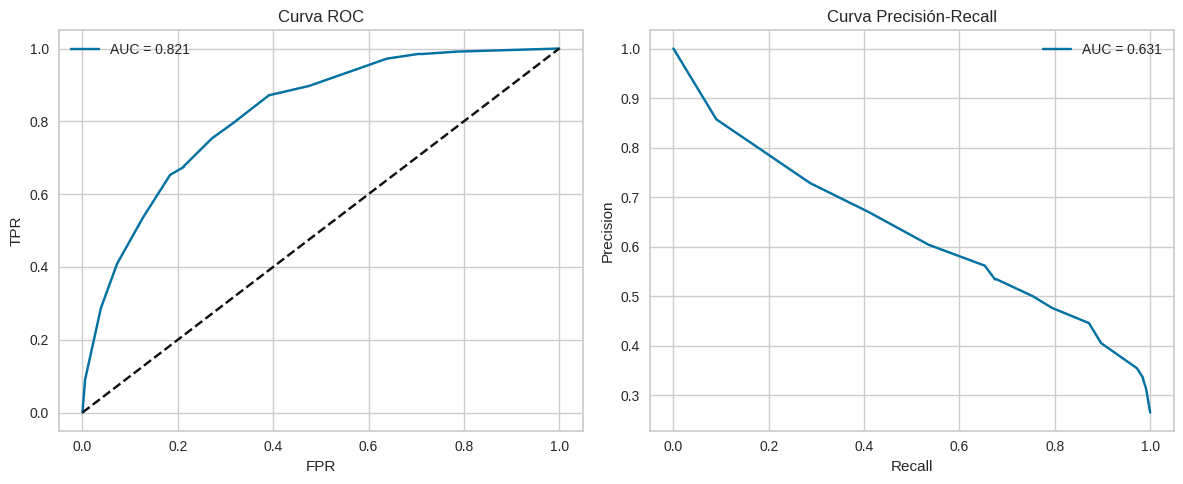

In [34]:
## Visualización de Curvas ROC y Precisión-Recall
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Probabilidades del modelo
y_proba = modelo_arbol_A.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precisión-Recall')
plt.legend()

plt.tight_layout()
plt.show()

**Observaciones**

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| **ROC AUC** | 0.821 | Modelo con buena capacidad discriminativa |
| **PR AUC**  | 0.631 | Moderado, típico en datasets desbalanceados |

* Curva ROC alejada de la diagonal, implica buen desempeño
* Curva PR es más sensible al desbalance
* AUC bajo, pero aún es útil

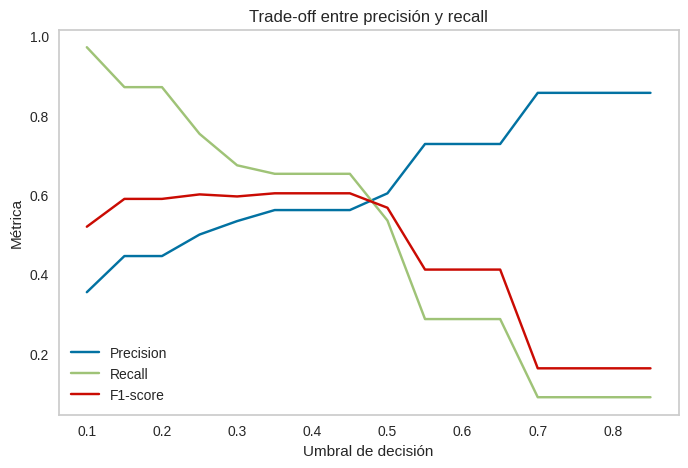

In [35]:
# Ajuste del Umbral de Decisión

from sklearn.metrics import f1_score, precision_score, recall_score

thresholds = np.arange(0.1, 0.9, 0.05)
scores = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    scores.append({
        'threshold': t,
        'precision': precision_score(y_test, y_pred_thresh),
        'recall': recall_score(y_test, y_pred_thresh),
        'f1': f1_score(y_test, y_pred_thresh)
    })

# Visualización
scores_df = pd.DataFrame(scores)

plt.figure(figsize=(8, 5))
plt.plot(scores_df['threshold'], scores_df['precision'], label='Precision')
plt.plot(scores_df['threshold'], scores_df['recall'], label='Recall')
plt.plot(scores_df['threshold'], scores_df['f1'], label='F1-score')
plt.xlabel('Umbral de decisión')
plt.ylabel('Métrica')
plt.title('Trade-off entre precisión y recall')
plt.legend()
plt.grid()
plt.show()


**Observaciones**

* El comportamiento de la precisión sube y el recall baja.
* F1 tiene un máximo (umbral óptimo) entre 0.4 y 0.5 lo que muestra un comportamiento típico en clasificación binaria y es consistente con maximización de F1-score en problemas desbalanceados.
* El Recall debe priorizarse para detectar la mayor cantidad posible de churn para eso, se recomienda bajar el umbral aceptando más falsos positivos pero menos falsos negativos.

In [36]:
# Validación Cruzada con AUC

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

for train_idx, test_idx in cv.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    modelo_arbol_A.fit(X_train_cv, y_train_cv)
    y_proba_cv = modelo_arbol_A.predict_proba(X_test_cv)[:, 1]
    auc_scores.append(roc_auc_score(y_test_cv, y_proba_cv))


print(f"AUC promedio en CV: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")


AUC promedio en CV: 0.822 ± 0.007


**Observaciones**

* El valor 0.822 ± 0.007 refleja consistencia: coincide con el AUC ROC observado en la curva (0.821), lo que sugiere que el modelo generaliza bien.

* La desviación estándar baja, indica estabilidad entre folds.


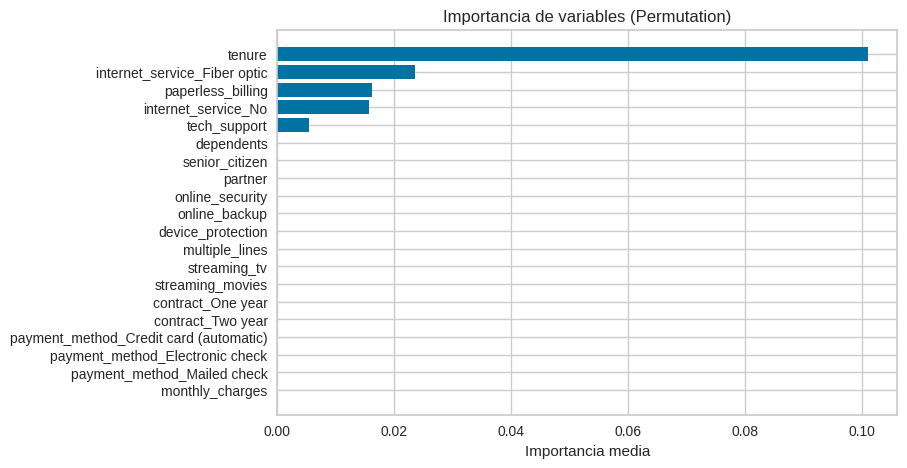

In [37]:
# Importancia de Variables

from sklearn.inspection import permutation_importance

result = permutation_importance(modelo_arbol_A, X_test, y_test, n_repeats=10, random_state=42)
importances = pd.DataFrame({
    'feature': X_test.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# Visualización
plt.figure(figsize=(8, 5))
plt.barh(importances['feature'], importances['importance'])
plt.xlabel('Importancia media')
plt.title('Importancia de variables (Permutation)')
plt.gca().invert_yaxis()
plt.show()



**Observaciones**

* Las variables tenure, internet_service_Fiber optic y paperless_billing aparecen como variables dominantes.
* Validación cruzada. El el promedio del cálculo dentro de cada fold debe ser muy bueno
* monthly_charges presenta baja importancia, por lo que, estimaremos su influencia al segmentarla.


####**Reevaluación del umbral**

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluar_umbral(y_true, y_proba, plot=True):

    # Evalúa la precisión, recall y F1-score para distintos umbrales.
    # Devuelve el umbral óptimo según F1-score.

    umbrales = np.linspace(0.0, 1.0, 100)
    precision_vals = []
    recall_vals = []
    f1_vals = []

    for u in umbrales:
        y_pred = (y_proba >= u).astype(int)
        precision_vals.append(precision_score(y_true, y_pred, zero_division=0))
        recall_vals.append(recall_score(y_true, y_pred))
        f1_vals.append(f1_score(y_true, y_pred))

    # Umbral óptimo según F1-score
    idx_opt = np.argmax(f1_vals)
    umbral_optimo = umbrales[idx_opt]

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(umbrales, precision_vals, label='Precisión', color='blue')
        plt.plot(umbrales, recall_vals, label='Recall', color='green')
        plt.plot(umbrales, f1_vals, label='F1-score', color='red')
        plt.axvline(x=umbral_optimo, color='black', linestyle='--', label=f'Óptimo F1 ≈ {umbral_optimo:.2f}')
        plt.xlabel('Umbral de decisión')
        plt.ylabel('Valor de métrica')
        plt.title('Métricas vs Umbral de decisión')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    print(f"Umbral óptimo según F1-score: {umbral_optimo:.2f}")
    return umbral_optimo


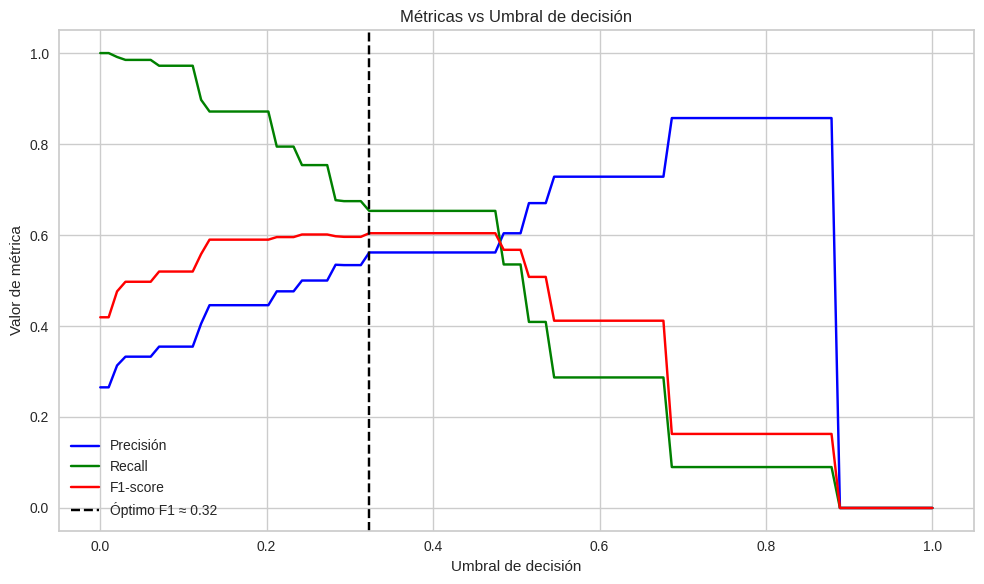

Umbral óptimo según F1-score: 0.32
Precisión: 0.5616942909760589
Recall: 0.6531049250535332
F1-score: 0.6039603960396039


In [39]:
umbral_optimo = evaluar_umbral(y_test, y_proba)

# Aplicar el umbral óptimo para predicción final
y_pred_final = (y_proba >= umbral_optimo).astype(int)

# Métricas finales
print("Precisión:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1-score:", f1_score(y_test, y_pred_final))


**Observaciones**

* Como es típico, precisión aumenta con el umbral y recall disminuye.
* F1-score muestra un máximo claro en 0.32.

Con este umbral las métricas son:

| Métrica   | Valor |
|-----------|-------|
| Precisión | 0.561 |
| Recall    | 0.653 |
| F1-score  | 0.604 |

* El modelo detecta bien los churn (recall decente).
* Acepta algunos falsos positivos (precisión moderada).
* El balance entre ambos es óptimo en ese punto.

EL set de datos utilizado se encuentra desbalanceado, de allí que los resultados sean favorables.

Se aplicará la detección del umbral óptimo al próximo modelo luego de balanceo de clases.

##**Modelo con balanceo de clases y segmentación de la variable monthly_charges**

**Características**

* Balanceo de clases con SMOTE.
* Segmentación de la variable monthly_charges.
* No incluye la variable total_charges.

 Balanceo con SMOTE
  - Busca mejorar el aprendizaje.
  - Genera probabilidades más calibradas.
  - El ajuste de umbral tiene más sentido, porque parte de una base más justa.

* Segmentación de la variable monthly_charges
  - Las categorías están más representadas gracias al equilibrio de las clases.

* Modelo a utilizar RandomForrestclassifier con 100 estimadores

* Evaluación con métricas sensibles al desbalance para visualizar el sesgo hacia la clase mayoritaria
  - precision, recall, f1-score
  - Ajuste de umbral

* Se ajustará el modelo al umbral de balanceo por F1_score y se estudiarán sus métricas.


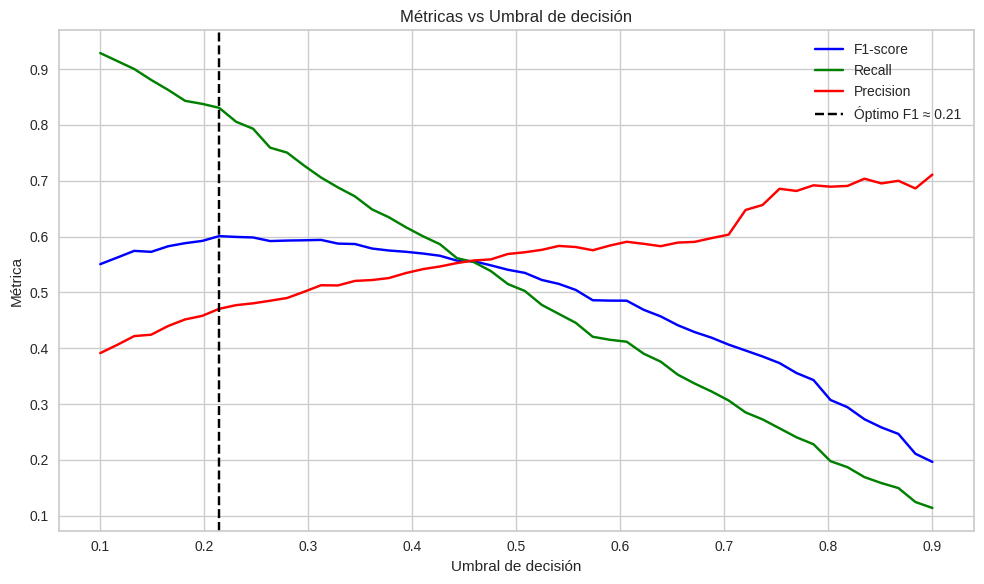

Umbral óptimo según F1-score: 0.21
Precisión: 0.4707070707070707
Recall: 0.8306595365418895
F1-score: 0.600902643455835


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


# Separación de variables y definición de variables de entrenamiento
X = datos_modelo_OHE.drop(columns=["total_charges"])
y=y_OHE

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Definición del segmentador
bin_encoder = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile'))
])

# Definición del transformador
transformador = ColumnTransformer(transformers=[
    ('monthly_bins', bin_encoder, ['monthly_charges'])
], remainder='passthrough')

# Balanceo con SMOTE
X_train_transformada = transformador.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_transformada, y_train)

# Entrenamiento del modelo
modelo_RandomForrest_C = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_RandomForrest_C.fit(X_train_bal, y_train_bal)

# Evaluación y ajuste de umbral
X_test_transformada = transformador.transform(X_test)
y_proba = modelo_RandomForrest_C.predict_proba(X_test_transformada)[:, 1]

umbrales = np.linspace(0.1, 0.9, 50)
f1_scores, recalls, precisions = [], [], []

for t in umbrales:
    y_pred = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))

# Visualización
umbral_optimo = umbrales[np.argmax(f1_scores)]

plt.figure(figsize=(10, 6))
plt.plot(umbrales, f1_scores, label='F1-score', color='blue')
plt.plot(umbrales, recalls, label='Recall', color='green')
plt.plot(umbrales, precisions, label='Precision', color='red')
plt.axvline(x=umbral_optimo, color='black', linestyle='--', label=f'Óptimo F1 ≈ {umbral_optimo:.2f}')
plt.xlabel('Umbral de decisión')
plt.ylabel('Métrica')
plt.title('Métricas vs Umbral de decisión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Métricas finales en umbral óptimo
y_pred_final = (y_proba >= umbral_optimo).astype(int)
print(f"Umbral óptimo según F1-score: {umbral_optimo:.2f}")
print("Precisión:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1-score:", f1_score(y_test, y_pred_final))


**Observaciones**

| Métrica   | Valor en umbral óptimo (≈ 0.21) |
|-----------|---------------------------------|
| Precisión | 0.47                            |
| Recall    | 0.83                            |
| F1-score  | 0.60                            |


* El umbral obtenido es bajo lo que  favorece el recall, indicando que el modelo está capturando la mayoría de los casos de churn.
* La precisión es moderada, pero como es un trade-off, hay falsos positivos aceptables para detectar rápidamente el churn.
* La gráfica muestra claramente cómo el recall cae al aumentar el umbral, mientras la precisión sube.



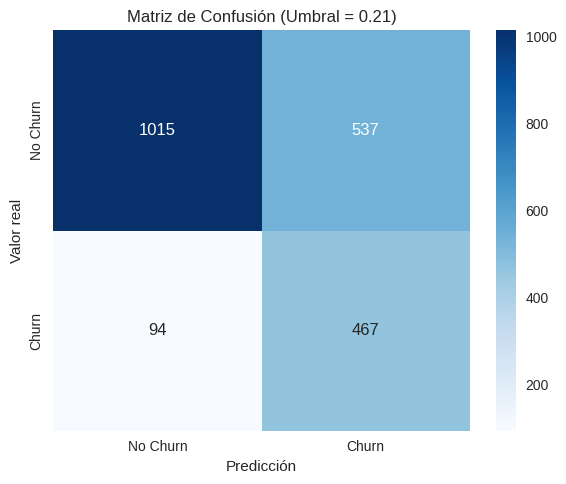

In [41]:
# Ajuste del modelo al umbral de balanceo

from sklearn.metrics import confusion_matrix
# y_test: etiquetas reales
# y_pred_proba: probabilidades predichas por el modelo
# threshold: umbral de decisión

# Umbral de balanceo por F1_score
umbral = 0.21

y_pred = (modelo_RandomForrest_C.predict_proba(X_test_transformada)[:, 1] >= umbral).astype(int)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)
labels = ['No Churn', 'Churn']

# Visualización
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title(f'Matriz de Confusión (Umbral = {umbral})')
plt.tight_layout()

plt.show()


In [42]:
print(cm)

[[1015  537]
 [  94  467]]


In [43]:
# Valores extraídos de la matriz
TN = 1015
FP = 537
FN = 94
TP = 467

# Métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1_score:.3f}")


Accuracy:  0.701
Precision: 0.465
Recall:    0.832
F1-score:  0.597


**Observaciones**

* Recall alto por lo que el modelo,  detecta bien los casos de churn.
* Precision moderada, Existen varios falsos positivos (537), lo que puede implicar costos innecesarios si se activan campañas sobre clientes que no se iban.
* F1-score balaceo precisión y recall, puede haber margen de mejora.



##**Modelo con balanceo de clases, escalado, selección y regularización de variables**

**Características**

* Nombre: Modelo Original.
* Balanceo de clases con SMOTE.
* Escalado de variables númericas
* Selección y regularización de variables
* No incluye la variable total_charges.
* No se segmenta la variable monthly_charges

Balanceo con SMOTE
  - Busca mejorar el aprendizaje.
  - Genera probabilidades más calibradas.
  - El ajuste de umbral tiene más sentido, porque parte de una base más justa.
  
Escalado de variables
  - Para comparar variables con diferentes unidades o escalas de medición.
  - Para evitar que ciertas variables con valores más grandes dominen los cálculos.

Selección y regularización de variables
  - Reducción de variables eliminado  aquellas con coeficientes nulos, con Lassso.
  - Sobre el conjunto reducido, se eliminan las variables menos relevantes a través de RFE.

Modelo a utilizar RandomForrestclassifier con estimadores por defecto

Evaluación de métricas
  - precision, recall, f1-score, etc.
  - Matriz de confusión.
  - Curvas ROC-AUC
  - Clasiffication Report
  - Ajuste del umbral por:
    - F1_scores para balanceo
    - Recalls para potenciar el objetivo

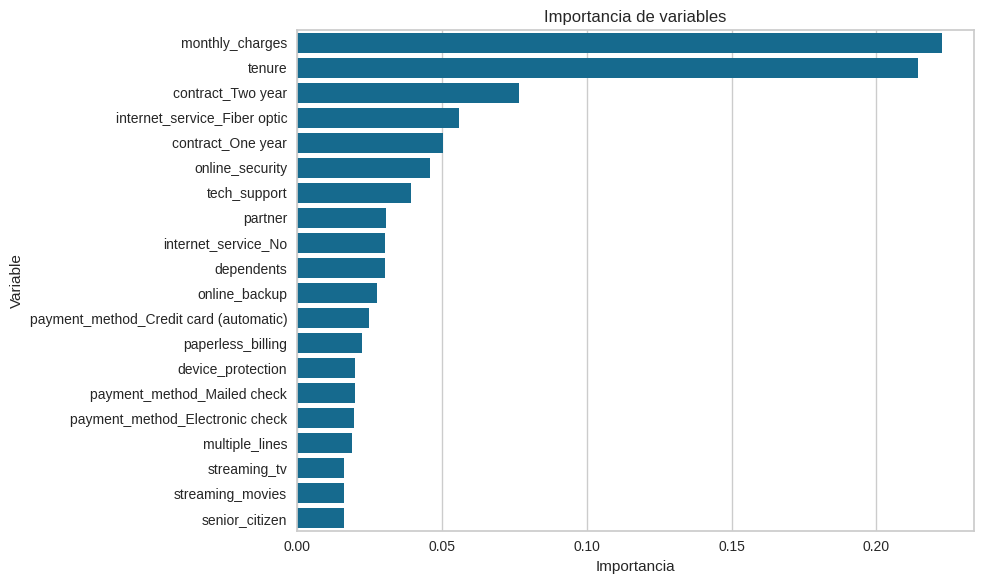

In [44]:
# Selección de variables
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Datos
X = datos_modelo_OHE.drop(columns=["total_charges"])
y = y_OHE

# Pipeline con SMOTE + Escalado + Lasso
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegressionCV(
        Cs=10, cv=5, penalty='l1', solver='saga', scoring='f1', max_iter=10000
    ))
])
pipeline.fit(X, y)
coef = pipeline.named_steps['lasso'].coef_[0]
selected_features_lasso = X.columns[coef != 0]

# SMOTE antes de RFE y RandomForest
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

# RFE con Random Forest
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X_sm, y_sm)
selected_features_rfe = X.columns[rfe.support_]

# Entrenamiento final con Random Forest
modelo_RandomForrest_D = RandomForestClassifier(random_state=42)
modelo_RandomForrest_D.fit(X_sm, y_sm)
importances = pd.Series(modelo_RandomForrest_D.feature_importances_, index=X.columns)

# Gráfico de importancia
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.sort_values(ascending=False), y=importances.sort_values(ascending=False).index)
plt.title("Importancia de variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()



Métricas del modelo:
Accuracy:  0.761
Precision: 0.548
Recall:    0.579
F1-score:  0.563
ROC AUC:   0.811


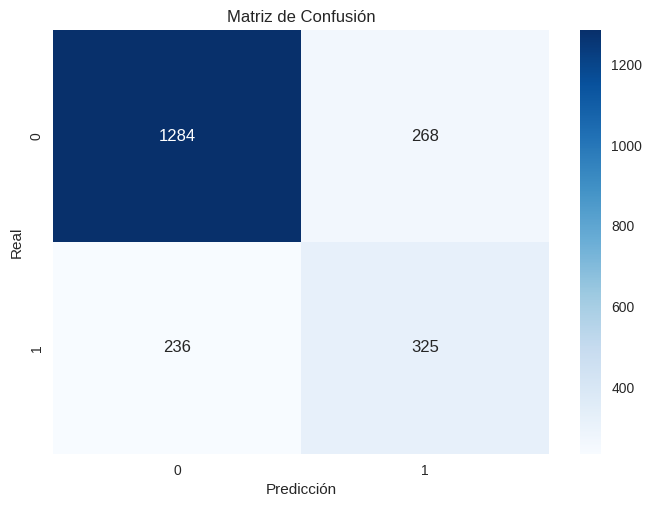


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1552
           1       0.55      0.58      0.56       561

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.76      0.76      2113

[[1284  268]
 [ 236  325]]


In [45]:
# Creación del modelo basado en las variables seleccionadas
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Separación de datos antes de SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Entrenar el modelo
modelo_RandomForrest_D = RandomForestClassifier(random_state=42)
modelo_RandomForrest_D.fit(X_train_sm, y_train_sm)

# Predicciones sobre el test (sin SMOTE)
y_pred = modelo_RandomForrest_D.predict(X_test)
y_proba = modelo_RandomForrest_D.predict_proba(X_test)[:, 1]

# Métricas
print("Métricas del modelo:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(cm)


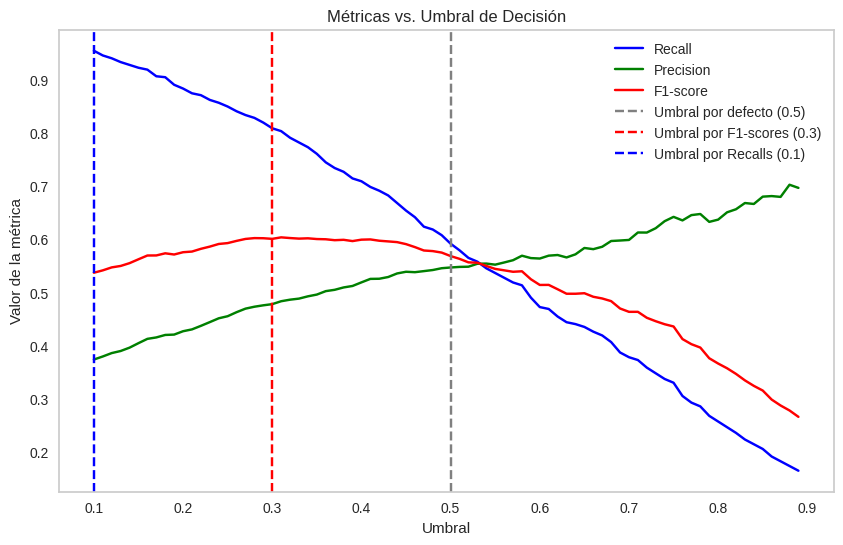

Umbral para F1_scores (Balanceado) 0.30999999999999994
Umbral para Recalls 0.1


In [46]:
# Ajuste del umbral

import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)

# Generar probabilidades
y_proba = modelo_RandomForrest_D.predict_proba(X_test)[:, 1]

# Crear lista de umbrales posibles
thresholds = np.arange(0.1, 0.9, 0.01)

# Almacenar métricas para cada umbral
recalls = []
precisions = []
f1_scores = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))


idx_max_f1 = np.argmax(f1_scores)
umbral_optimo_F1 = thresholds[idx_max_f1]
texto1 = 'Umbral por F1-scores (' + str((round(umbral_optimo_F1, 1)))  + ')'
idx_max_f1 = np.argmax(recalls)
umbral_optimo_Recalls = thresholds[idx_max_f1]

texto2 = 'Umbral por Recalls (' + str((round(umbral_optimo_Recalls, 1))) + ')'

# Graficar resultados
plt.figure(figsize=(10,6))
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='green')
plt.plot(thresholds, f1_scores, label='F1-score', color='red')
plt.axvline(x=0.5, color='grey', linestyle='--', label='Umbral por defecto (0.5)')

plt.axvline(x=round(umbral_optimo_F1, 1), color='red', linestyle='--', label=texto1)
plt.axvline(x=round(umbral_optimo_Recalls, 1), color='blue', linestyle='--', label=texto2)

plt.title('Métricas vs. Umbral de Decisión')
plt.xlabel('Umbral')
plt.ylabel('Valor de la métrica')
plt.legend()
plt.grid()
plt.show()

print('Umbral para F1_scores (Balanceado)', umbral_optimo_F1)
print('Umbral para Recalls', umbral_optimo_Recalls)



###**Modelos con ajuste del umbral por F1_scores y Recalls para el modelo Original**

**Características**

* Nombre: Modelo Ajustado por F1_scores y Modelo Ajustado por Recalls
* Las mismas características definidas para el modelo Original, pero con ajuste para balanceo (F1_score) y para aumentar la detección de churn (Recall).

Modelo ajustado a umbral por F1_scores :
Métricas del modelo:
Accuracy:  0.720
Precision: 0.483
Recall:    0.804
F1-score:  0.604
ROC AUC:   0.811


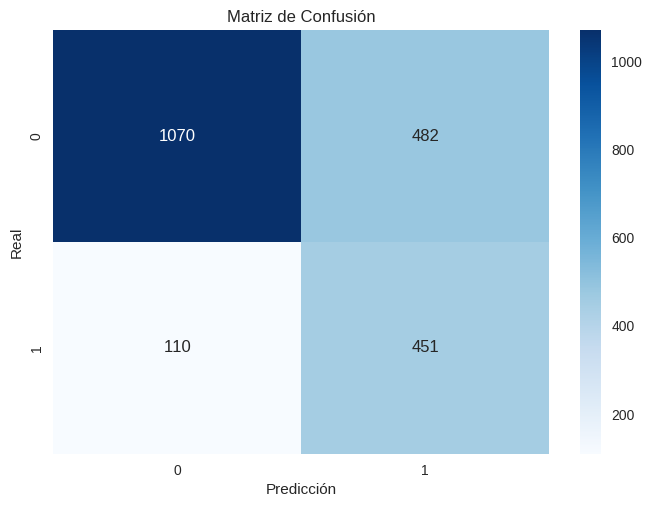


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1552
           1       0.48      0.80      0.60       561

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.79      0.72      0.74      2113

[[1070  482]
 [ 110  451]]


In [47]:
# Modelo ajustado por F1_scores
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)


# Separación de datos antes de SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Entrenar el modelo
modelo_RandomForrest_D = RandomForestClassifier(random_state=42)
modelo_RandomForrest_D.fit(X_train_sm, y_train_sm)

# Predicciones sobre el test (sin SMOTE)
#y_pred = modelo_RandomForrest_D.predict(X_test)
y_pred = (modelo_RandomForrest_D.predict_proba(X_test)[:, 1] >= umbral_optimo_F1).astype(int)
y_proba = modelo_RandomForrest_D.predict_proba(X_test)[:, 1]

# Métricas
print("Modelo ajustado a umbral por F1_scores :")
print("Métricas del modelo:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(cm)


Modelo ajustado a umbral por Recalls:
Métricas del modelo:
Accuracy:  0.563
Precision: 0.374
Recall:    0.955
F1-score:  0.537
ROC AUC:   0.811


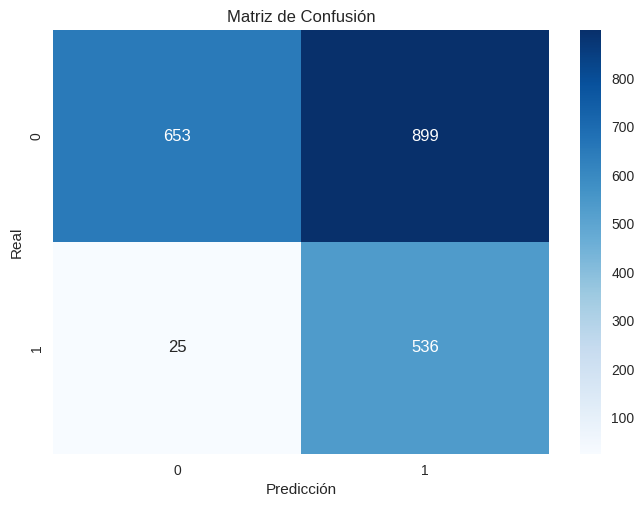


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.42      0.59      1552
           1       0.37      0.96      0.54       561

    accuracy                           0.56      2113
   macro avg       0.67      0.69      0.56      2113
weighted avg       0.81      0.56      0.57      2113

[[653 899]
 [ 25 536]]


In [48]:
# Modelo ajustado por Recalls
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)


# Separación de datos antes de SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Entrenar el modelo
modelo_RandomForrest_D = RandomForestClassifier(random_state=42)
modelo_RandomForrest_D.fit(X_train_sm, y_train_sm)

# Predicciones sobre el test (sin SMOTE)
#y_pred = modelo_RandomForrest_D.predict(X_test)
y_pred = (modelo_RandomForrest_D.predict_proba(X_test)[:, 1] >= umbral_optimo_Recalls).astype(int)
y_proba = modelo_RandomForrest_D.predict_proba(X_test)[:, 1]

# Métricas
print("Modelo ajustado a umbral por Recalls:")
print("Métricas del modelo:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(cm)


**Modelo: modelo_RandomForrest_D - Comparación del modelo original con las versiones ajustadas por umbral**

**Métricas**

| Métrica       | Original         | Ajuste por F1-score | Ajuste por Recall |
|---------------|------------------|----------------------|--------------------|
| Accuracy      | 0.761            | 0.72                 | 0.563              |
| Precision (1) | 0.55             | 0.48                 | 0.37               |
| Recall (1)    | 0.58             | 0.80                 | 0.96               |
| F1-score (1)  | 0.56             | 0.60                 | 0.54               |
| ROC AUC       | 0.811            | —                    | 0.811              |

**Observaciones**
- El ajuste por **recall** maximiza la sensibilidad (0.96), pero a costa de una fuerte caída en precisión y accuracy.
- El ajuste por **F1-score** logra un mejor balance entre precisión y recall, con una ligera pérdida de accuracy.
- El modelo **original** tiene mayor precisión, pero detecta menos casos reales de churn.



**Matriz de Confusión**

| Umbral         | TP  | FN  | FP  | TN  |
|----------------|-----|-----|-----|-----|
| Original       | 325 | 236 | 268 | 1284 |
| F1-score       | 451 | 110 | 482 | 1070 |
| Recall         | 536 | 25  | 899 | 653  |

**Observaciones**
- El ajuste por **recall** reduce los falsos negativos a solo 25, lo cual es excelente si el costo de no detectar churn es alto.
- Sin embargo, genera **899 falsos positivos**, lo que puede implicar muchas acciones innecesarias.
- El ajuste por **F1-score** ofrece una solución intermedia: mejora la detección sin saturar de falsos positivos.

**Resumen**
- Si el objetivo es **maximizar la detección de churn sin importar el costo de intervención**, el ajuste por **recall** es ideal.
- Si se busca un **balance entre intervención y efectividad**, el ajuste por **F1-score** es más prudente.
- El modelo **original** puede ser útil si el costo de falsos positivos es muy alto y se prioriza la precisión.

##**Evaluación de Sobreajuste**

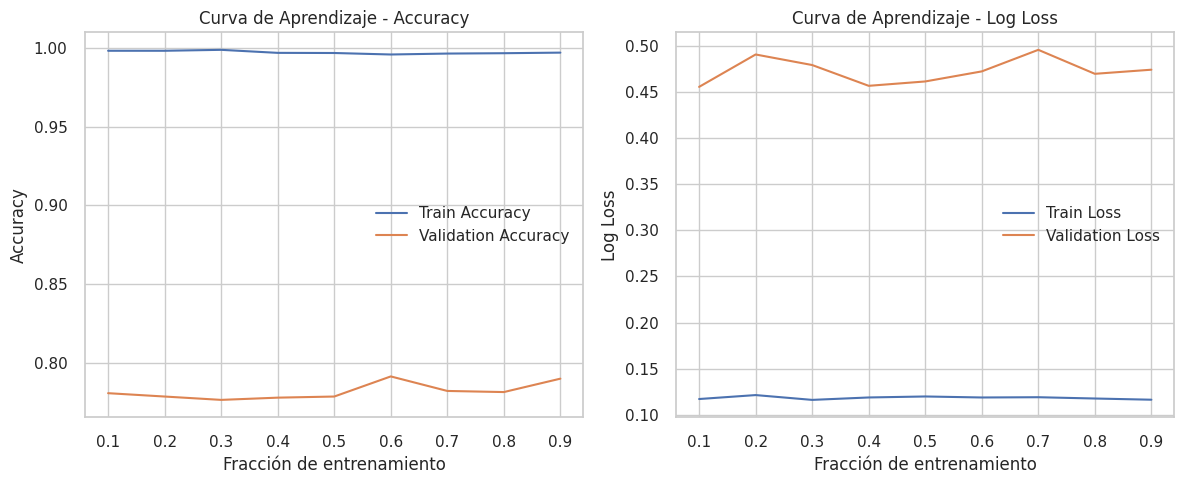

In [49]:
# Análisis de curvas de aprendizaje Accuracy y Log LOSS
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Estilo de gráficos
sns.set(style="whitegrid")

# Simulación de datos (reemplaza con tus datos reales)
X = datos_modelo_OHE.drop(columns=["total_charges"])
y = y_OHE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Inicializar modelo
model = RandomForestClassifier(random_state=42)

# Curvas de aprendizaje
train_sizes = np.linspace(0.1, 0.9, 9)
train_acc, val_acc, train_loss, val_loss = [], [], [], []

for frac in train_sizes:
    X_part, _, y_part, _ = train_test_split(X_train, y_train, train_size=frac, random_state=42)
    model.fit(X_part, y_part)
    train_acc.append(accuracy_score(y_part, model.predict(X_part)))
    val_acc.append(accuracy_score(y_test, model.predict(X_test)))
    train_loss.append(log_loss(y_part, model.predict_proba(X_part)))
    val_loss.append(log_loss(y_test, model.predict_proba(X_test)))

# Graficar curvas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_acc, label='Train Accuracy')
plt.plot(train_sizes, val_acc, label='Validation Accuracy')
plt.title('Curva de Aprendizaje - Accuracy')
plt.xlabel('Fracción de entrenamiento')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_loss, label='Train Loss')
plt.plot(train_sizes, val_loss, label='Validation Loss')
plt.title('Curva de Aprendizaje - Log Loss')
plt.xlabel('Fracción de entrenamiento')
plt.ylabel('Log Loss')
plt.legend()
plt.tight_layout()
plt.show()


**Observaciones**

- Las curvas muestran una alta precisión en entrenamiento, pero una caída significativa en validación.
- El log loss es mucho menor en entrenamiento que en validación.
- El modelo está sobreajustado.



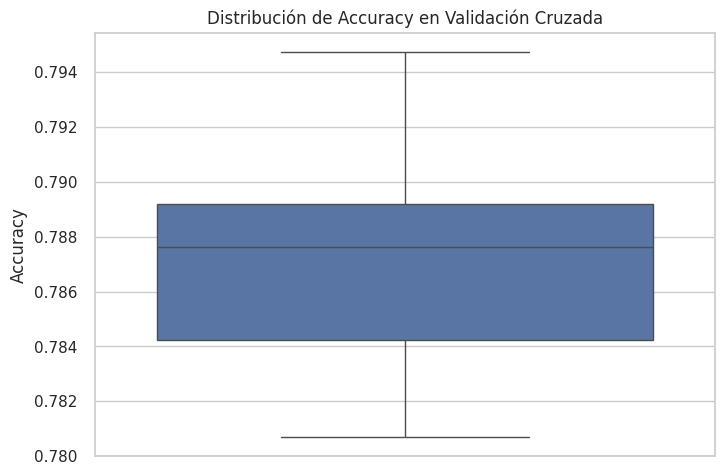

Accuracy promedio: 0.787 ± 0.005


In [50]:
# Validación cruzada
# Se utiliza la variable model del script anterior
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

sns.boxplot(data=cv_scores)
plt.title('Distribución de Accuracy en Validación Cruzada')
plt.ylabel('Accuracy')
plt.show()

print(f"Accuracy promedio: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


**Observaciones**

- Accuracy promedio: 0.787  
- Desviación estándar: ± 0.005  
- Rango de valores: de 0.780 a 0.794  
- IQR (rango intercuartílico): aproximadamente entre 0.786 y 0.788

Modelo estable:
- La baja desviación estándar (0.005) indica que el modelo es estable frente a distintas particiones del conjunto de entrenamiento.
- No hay outliers ni dispersión excesiva, lo que sugiere que el modelo no está variando mucho entre folds.

Desempeño moderado:
- Aunque el modelo es estable, el accuracy promedio de 0.787 es significativamente menor que el accuracy en entrenamiento (~1.00 según tu curva).
- Esto confirma el diagnóstico previo de overfitting: el modelo generaliza peor de lo que aparenta en entrenamiento.


**En resumen**

Para que el modelo mejore sus métricas y se revierta el sobreajuste existente, es necesario:
- Reducir complejidad del modelo, ajustando los hiperparámetros.

- Eliminar variables irrelevantes o colineales puede mejorar la capacidad de generalización.

- El accuracy no captura bien el balance entre clases, considera ajustar el umbral para optimizar el balanceo usando F1-score o la detección de churn con recall.

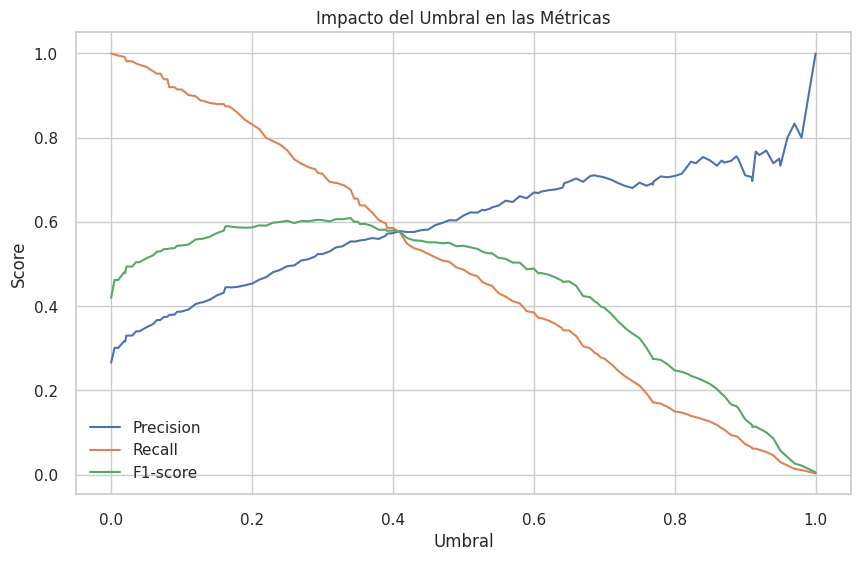

In [51]:
# Impacto del umbral
from sklearn.metrics import precision_recall_curve
# Se utiliza la variable model del script anterior
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-score')
plt.title('Impacto del Umbral en las Métricas')
plt.xlabel('Umbral')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


**Observaciones**

| Métrica     | Tendencia al aumentar el umbral |
|-------------|----------------------------------|
| **Precision** | Aumenta progresivamente |
| **Recall**    | Disminuye rápidamente |
| **F1-score**  | Tiene un pico intermedio |

- Precision alta en umbrales altos: El modelo se vuelve más conservador, predice menos positivos, pero con mayor certeza.
- Recall alto en umbrales bajos: El modelo detecta más positivos, pero incluye más falsos positivos.
- F1-score óptimo: Se alcanza en un umbral intermedio (~0.35–0.45), donde el balance entre precision y recall es máximo.

##**Modelo ajustado por hiperparámetros**

**Caracteristicas**

* Nombre: Modelo Ajustado por Hiperparámetros.
* Balanceo de clases con SMOTE.
* Modelo a utilizar RandomForrestclassifier
* Ajuste de hiperparámetros.
* Selección de variables
* Evaluación de métricas
* Incluye la variable total_charges.
* No se segmenta la variable monthly_charges

Balanceo con SMOTE
  - Busca mejorar el aprendizaje.
  - Genera probabilidades más calibradas.
  - El ajuste de umbral tiene más sentido, porque parte de una base más justa.

El modelo RandomForrestclassifier
  - Ajustado por hiperparámetros.

Ajuste de hiperparámetros
  * Los parámetros serán ajustados de la siguiente forma:
    - n_estimators=100,
    - max_depth=5,
    - min_samples_split=10,
    - min_samples_leaf=5,
    - max_features='sqrt',
    - random_state=42
  *Limitar max_depth, min_samples_leaf, min_samples_split reduce la complejidad.
  * max_features='sqrt' introduce diversidad entre árboles.

* Selección de variables
  - Basadas en la importancia utilizando SelectFromModel con un umbral de mediana.

* Evaluación de métricas
  - precision, recall, f1-score, etc.
  - Matriz de confusión.
  - ROC-AUC
  - Clasiffication Report

In [52]:
# Separación de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Aplicación de SMOTE solo al conjunto de entrenamiento
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Entrenamiento con Random Forest regularizado
from sklearn.ensemble import RandomForestClassifier

modelo_RandomForrest_D = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

modelo_RandomForrest_D.fit(X_train_sm, y_train_sm)

# Selección de variables basada en importancia
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(modelo_RandomForrest_D, threshold='median', prefit=True)
X_train_sel = selector.transform(X_train_sm)
X_test_sel = selector.transform(X_test)

# Reentrenamiento con variables seleccionadas
modelo_RandomForrest_D.fit(X_train_sel, y_train_sm)

# Predicción y evaluación
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = modelo_RandomForrest_D.predict(X_test_sel)
y_proba = modelo_RandomForrest_D.predict_proba(X_test_sel)[:, 1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Matriz de confusión:
[[1137  415]
 [ 132  429]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1552
           1       0.51      0.76      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113


ROC AUC: 0.8316


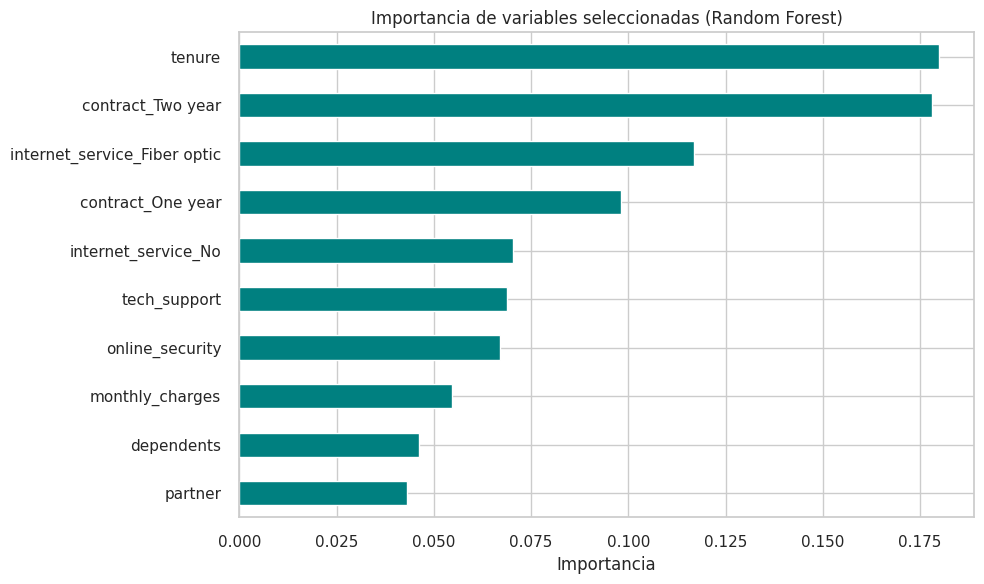

In [53]:
# Entrenamiento inicial para selección
modelo_inicial = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
modelo_inicial.fit(X_train_sm, y_train_sm)

# Selección de variables
selector = SelectFromModel(modelo_inicial, threshold='median', prefit=True)
mascara = selector.get_support()
features_seleccionadas = pd.DataFrame(X_train_sm, columns=X.columns).columns[mascara]
importancias_filtradas = modelo_inicial.feature_importances_[mascara]

# Visualización
plt.figure(figsize=(10, 6))
pd.Series(importancias_filtradas, index=features_seleccionadas).sort_values().plot(kind='barh', color='teal')
plt.title("Importancia de variables seleccionadas (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()



**Observaciones**


- tenure aparece como la variable más influyente, lo que sugiere que el tiempo de permanencia está fuertemente vinculado con la propensión al churn.
- La variable contract_Two year y la variable internet_service_Fiber optic, también tienen alta relevancia, indicando que ciertas combinaciones de servicio y tipo de contrato afectan la fidelización.
- La presencia de variables como tech_support y online_security refuerza la hipótesis de que la disponibilidad de servicios complementarios puede mitigar el churn.


---


In [54]:
#Modelo de SelecFormalModel

modelo_final = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
modelo_final.fit(X_train_sel, y_train_sm)

# Evaluación
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = modelo_final.predict(X_test_sel)
y_proba = modelo_final.predict_proba(X_test_sel)[:, 1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Matriz de confusión:
[[1137  415]
 [ 132  429]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1552
           1       0.51      0.76      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113


ROC AUC: 0.8316


**Comparación General de los modelos**


**Métricas**

| Métrica           | Original | Ajustado por F1_scores | Ajustado por Recalls | Ajustado por Hiperparámetros |
| ----------------- | -------- | --------- | ------------- | ------------ |
| Accuracy      | 0.76     | 0.72      | 0.56          | 0.74         |
| Precision (0) | 0.84     | 0.91      | 0.96          | 0.90         |
| Recall (0)    | 0.83     | 0.69      | 0.42          | 0.73         |
| F1 (0)        | 0.84     | 0.78      | 0.59          | 0.81         |
| Precision (1) | 0.55     | 0.48      | 0.37          | 0.51         |
| Recall (1)    | 0.58     | 0.80      | 0.96          | 0.76         |
| F1 (1)        | 0.56     | 0.60      | 0.54          | 0.61         |
| ROC AUC       | 0.70     | 0.75      | 0.69          | 0.832        |


**Matrices de Confusión**

| Modelo     | VP (1) | FN (1) | FP (0) | VN (0) |
| ---------- | ------ | ------ | ------ | ------ |
| Original      | 325    | 236    | 268    | 1284   |
| Ajustado por F1_scores     | 451    | 110    | 482    | 1070   |
| Ajustado por Recalls | 536    | 25     | 899    | 653    |
| Ajustado por Hiperparámetros  | 429    | 132    | 415    | 1137   |



**Observaciones**

* **Original**: Buen equilibrio general, pero con un recall moderado (0.58) para la clase positiva (churn). Es un punto de partida razonable.
* **Ajustado por F1_scores**: Sacrifica algo de precisión en la clase positiva a cambio de alto recall (0.80). Buena opción si interesa captar más casos de churn.
* **Ajustado por Recalls**: Maximiza el recall (0.96) para churn, pero a costa de una gran cantidad de falsos positivos (FP = 899).
* **Ajustado por Hiperparámetros**: Representa el mejor compromiso. Su recall para churn es alto (0.76), el F1 también (0.61), y el ROC AUC (0.83) indica excelente separación. Matriz de confusión más equilibrada.



**En resumen**

* Si el objetivo es priorizar el recall sin afectar en gran medida la precisión, el modelo ajustado por parámetros es superior.
* Si el objetivo es detectar casi todos los churn a toda costa, entonces el modelo ajustado por recalls cumple, pero con una gran pérdida de precisión.
* El modelo original es el más balanceado inicialmente, pero el modelo ajustado por hiperparámetros, lo supera en rendimiento general.

#**Conclusiones**

**Contexto**

  Desde la primera etapa de este proyecto fue posible establecer que:
  - La variable tenure influye con fuerza y de forma inversa sobre la variable churn.
  - Las contrataciones a largo plazo incrementan el no churn de clientes, y de la misma forma,
  - Servicios contratados también apoyan la retención de clientes.
  - Las variables total_charges genera más ruido que incidencia sobre la variable de estudio en la predicción.
  - La variable monthly_charges (segmentada o no), no es una variable con gran peso sobre la predicción, ocupando el octavo lugar dentro de las variables seleccionadas en forma automática.

  - Se crearon siete modelos producto del análisis preliminar en esta etapa y apoyado por los resultados de la primera.
  - En ellos se excluyeron las variables
    - expected_total
    - daily_charges
    - difference
    - customer_id
    - gender
    - phone_service

  - Modelos creados:
    - Los dos primeros son del tipo DecisionTreeClassifier que incluyen el Baseline sin ajustes y una mejora a esta base con la exclusión de la variable total_charges. Esto sugirió que esta variable, no incide sobre la predicción.
    - Los restantes son del tipo RandomForrestClassifier
      - El primero de ellos, no presentó una mejora notable, aún cuando no se tomó en cuenta la variable total_charges y se segmentó la variable monthly_charges, lo que sugurió, que esta no es una variable que influya en la predicción.
      - Los siguientes tres modelos (Original, Ajustado por F1_scores y Ajustado por Recalls) incluyeron balanceo de clases, escalado, selección y regularización de variables.
      - Los modelos ajustados por F1_scores y por Recalls provienen del modelo llamado Original y sus ajustes fueron realizados para generar un modelo balanceado y un modelo que potencie la detección del churn de clientes. Ninguno de estos modelos incluyó la variable total_charges.
      - El último modelo llamado Ajustado por Hiperparámetros, incluye a la variable total_charges y el balanceo de clases. En este modelo, se calculo de forma automática las variables que inciden en la predición, generando un modelo las mejores métricas en comparación con los demas modelos. ***Ver la visualización Comparativa de desempeño entre modelos***
  - El análisis de los modelos permitió establecer que las variables con incidencia en la predicción de churn de clientes son (en orden descendente):
      - tenure
      - contract_Two year
      - internet_service_Fiber optic
      - contract_One_year
      - internet_service_no
      - tech_support
      - online_security
      - monthly_charges
      - dependants
      - partner
  - La segmentación de monthly_charges no influyo significativamente en la predicción, miéntras que total_charges solo generó ruido.
  - Los modelos Ajustados ofrecen para distintos escenarios, su forma de predecir el churn de clientes.
    - El modelo ajustado por F1_scores, predice más casos como positivos, incluso si muchos son incorrectos (FP), lo que puede generar acciones y costos adicionales sí, se quiere retener al cliente.
    - El modelo Ajustado por Recalls maximiza el recall, pero genera muchas falso positivos, de igual forma que el modelo Ajustado por F1_scores, puede generar acciones y costos adicionales sí, se quiere retener al cliente.
    - El modelo Ajustado por Hiperparámetros presenta una predicción elevada de churn y un mejor compromiso por sus valores en F1_scores de 0.61 y ROC AUC de 0.83, por lo que predice probabilidades más altas para los positivos reales y predice probabilidades más bajas para los negativos reales (excelente separación).
    - También posee una matriz de confusión equilibrada.

##**Comparativa de desempeño entre modelos**

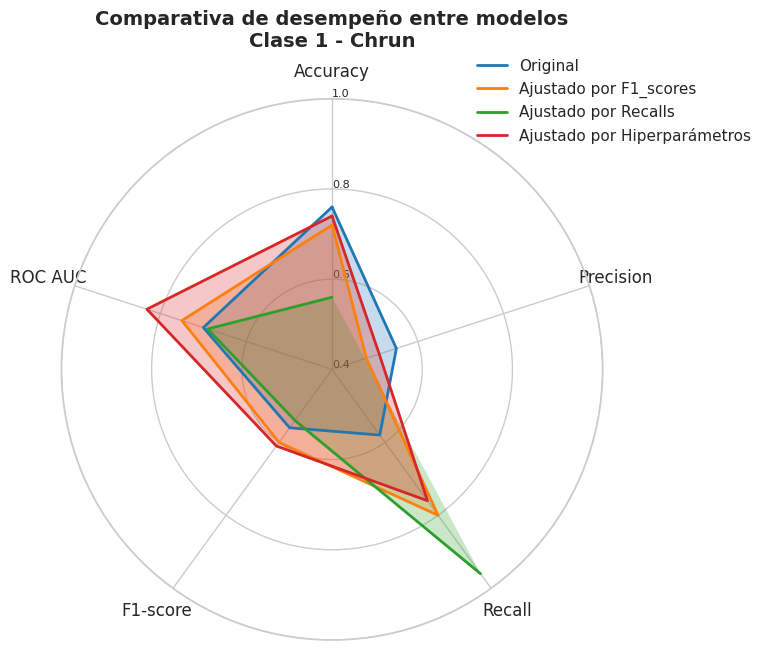

In [55]:
# Comparación visual entre modelos


# Datos extraídos de classification reports
data = {
    'Original':     [0.76, 0.55, 0.58, 0.56, 0.70],
    'Ajustado por F1_scores':    [0.72, 0.48, 0.80, 0.60, 0.75],
    'Ajustado por Recalls':[0.56, 0.37, 0.96, 0.54, 0.69],
    'Ajustado por Hiperparámetros': [0.74, 0.51, 0.76, 0.61, 0.8316]
}

# Métricas evaluadas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
df = pd.DataFrame(data, index=metrics)

# Preparación para gráfico radar
labels = np.array(metrics)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Estilo del gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Graficar cada modelo
for i, (model, values) in enumerate(df.items()):
    stats = values.tolist()
    stats += stats[:1]
    ax.plot(angles, stats, label=model, color=colors[i], linewidth=2)
    ax.fill(angles, stats, color=colors[i], alpha=0.25)

# Configuración del gráfico
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticks([0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.4', '0.6', '0.8', '1.0'], fontsize=8)
ax.set_ylim(0.4, 1.0)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.title('Comparativa de desempeño entre modelos\nClase 1 - Chrun\n\n', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Observaciones**

- Modelo Ajustado por Recalls domina en recall, pero su precision es muy baja.
- Modelo Ajustado por Hiperparámetros es el más equilibrado, con buena performance en todas las métricas.
- Modelo Ajustado por F1_scores prioriza el balance entre recall y f1-score, sacrificando un poco la precision.
- Modelo Original es el más conservador, sin extremos.

##**En resumen**

De los cuatro modelos seleccionados resaltan el modelo Ajustado por Hiperparámetros, que por su desempeño supera a los modelos Original y al Ajustado por F1_scores. También resalta el modelo Ajustado por Recalls que prioriza la detencción del churn a un costo que debe considerarse.

Ambos modelos ofrecen una solución a la predicción del abandono por parte de los clientes, pero están enfocados en visiones similares que difieren en el objetivo del negocio.

- Sí, el objetivo es priorizar el recall sin afectar en gran medida la precisión, el modelo Ajustado por Hiperparámetros es superior.
- Sí, el objetivo es detectar casi todos los churn a toda costa, entonces el modelo Ajustado por Recalls cumple, pero con una gran pérdida de precisión.

Según el objetivo las acciones a tomar para previenir el abandono por parte del cliente, deben considrar:
  - La alineación de las estratégias con los objetivos del negocio
  - Los costos asociados de análisis, implantación, retroalimentación, cambios en la cultura organizacional
  - Capacidad operativa en cada una de las etapas del ciclo de vida de la aplicación de las recomendaciones
  - Tiempo de duración de las acciones y selección del momento adecuado para aplicarlas
  - Análisis del impacto de las acciones tomadas y retroalimentación.

###**Recomendaciones**

Teniendo en cuenta que las variables que inciden en la predicción del churn se relacionan con la antigüedad, tiempo de contratación, servicios que se proveen y a la composición del grupo familiar, podemos establecer algunas recomendaciones y clasificar a estas variables de la siguiente forma:

- Antigüedad del cliente (Riesgo alto). Los clientes nuevos poseen más riego de churn por falta de vínculo:
  - Programa de bienvenida y acompañamiento en los primeros 90 días.
  - Bonificaciones por permanencia progresiva (mes 3, mes 6, etc.).
  - Servicio de atención personalizado para los primeros meses.

- Contratos (Riesgo medio). Los contratos cortos (mes a mes), poseen más riesgo de churn. Pueden estar relacionados con el servicio en general, que no puede responder a factores de calidad, competencia y precio que logren el aprecio del cliente:
  - Incentivar el cambio a contratos largos con descuentos, beneficios exclusivos, puntos de fidelidad.
  - Ofrecer migración sin penalización a planes anuales con mejores condiciones.

- Servicios críticos (Riesgo variable). Los servicios principales pueden estar correlacionados con el abandono sí, su calidad o beneficio no son los adecuados o prometidos. Pueden detectarse sí, son poco utilizados o por la cantidad de reportes presentados en soporte al cliente:
  - Analítica de uso: identificar servicios infrautilizados y ofrecer alternativas o capacitación.
  - Combos personalizados: Agrupar servicios con beneficios adicionales.
  - Detección de insatisfacción: Sí baja el uso de un servicio, lanzar alertas proactivas y toma de acciones por parte del equipo comercial.

- Grupo familiar (Riesgo alto). Los usuarios con familia o pareja suelen mostrar mayor estabilidad. Las decisiones son compartidas y varían en la apreciación de los servicios, responde al precio/beneficio y a la calidad:
  - Planes familiares con beneficios grupales o descuentos por servicio adicional.
  - Promociones de recomendación entre familiares/amigos.
  - Contenido o servicios enfocados en hogares con soporte técnico extendido, control parental, atención preferencial.


**Estrategias generales de retención**

- Intervención anticipada
  - Utilizar modelos predictivos en tiempo real para, desplegar alertas cuando un cliente alcanza un umbral crítico de propensión a churn, segmentar a los usuarios por perfiles.
  - Crear visualizaciones para el equipo comercial con las metricas del churn, variables clave y recomendaciones de acción.
- Incentivos personalizados
  - Ofrecer descuentos, upgrades o beneficios según el perfil y el riesgo.
- Contacto humano
  - En clientes con contratos largos o familiares, una llamada personalizada puede tener más impacto que un correo genérico, para ofrecer o presentar nuevos planes o para conocer la opinión del cliente.
- Establecer metodologías que permitan monitorear la satisfacción del cliente, independientemente del tiempo de permanencia, tipo de contrato y servicios adquiridos.
- Ofrecer flexibilidad para el cambio de planes o para la configuración del existente.
- Establecer un sistema de puntos por fidelidad (Gamificación) que incremente por la contratación y uso de los servicios, puntualidad en pagos, tiempo de permanencia, etc.
- Revisar y actulizar permanentemente la plataforma de servicios y de atención al cliente.
- Evaluar las opciones presentadas por la competencia y reducir el impacto en la perpectiva del cliente.
- Hacer seguimiento a los reportes de servicio del área de soporte o atención a clientes. Evaluar impacto en los servicios y en la permanencia.